In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings
from tqdm import tqdm_notebook
import re
import pickle

warnings.filterwarnings(action='ignore')
%matplotlib inline

In [ ]:
DATA_DIR = '/content/drive/MyDrive/투빅스 컨퍼런스/Data/'

steam_df = pd.read_csv('/content/drive/MyDrive/재테크/Steam/Data/steam_reviews_v2_clean.csv')

In [ ]:
mat = '(236850)|(22100)'

steam_df[steam_df['game_id'].astype(str).str.contains(mat)]['game_id'].unique()

array([  22100,  236850,  922100,  221001, 1122100,  422100])

In [ ]:
steam_df['game_id'].nunique()

24085

# Steam_image_meta_data genres 전처리

In [ ]:
df1 = pd.read_csv(DATA_DIR + 'Steam_image_meta_data_v1_0624.csv')
df2 = pd.read_csv(DATA_DIR + 'Steam_image_meta_data_v2_0624.csv')
df3 = pd.read_csv(DATA_DIR + 'Steam_image_meta_data_v3_0624.csv')

In [ ]:
df = pd.concat([df1, df2, df3]).reset_index(drop=True)
df.shape

(24085, 5)

In [ ]:
df.head()

,game_id,title,content,Image_url,genres
0,768520,Red Solstice 2: Survivors,Sequel to the best-seller ​The Red Solstice​. ...,https://cdn.akamai.steamstatic.com/steam/apps/...,\n\r\n\t\t\t\t\t\t\t\t\t\t\t\tStrategy RPG\t\t...
1,251570,7 Days to Die,7 Days to Die is an open-world game that is a ...,https://cdn.akamai.steamstatic.com/steam/apps/...,\n\r\n\t\t\t\t\t\t\t\t\t\t\t\tEarly Access\t\t...
2,671510,DESOLATE,DESOLATE is a first person horror survival exp...,https://cdn.akamai.steamstatic.com/steam/apps/...,\n\r\n\t\t\t\t\t\t\t\t\t\t\t\tSurvival\t\t\t\t...
3,613590,Dungeon Of Zaar - Open Beta,Dungeon of Zaar is a competitive tactical game...,https://cdn.akamai.steamstatic.com/steam/apps/...,\n\r\n\t\t\t\t\t\t\t\t\t\t\t\tStrategy\t\t\t\t...
4,374280,Hired Ops,Hired Ops is a session-based online shooter de...,https://cdn.akamai.steamstatic.com/steam/apps/...,\n\r\n\t\t\t\t\t\t\t\t\t\t\t\tFPS\t\t\t\t\t\t\...


In [ ]:
def get_clean_genres(x):
  if pd.isna(x):
    return x
  else:
    content = re.sub('[\t\r+]', '', x)
    content = re.sub(r'\n+', '\n',content)

    return content.strip().split('\n')

df['clean_genres'] = df['genres'].apply(get_clean_genres)

## 컬럼 설명

- game_id : 게임 key 값
- title	: 게임명
- content	: 게임에 대한 설명
- Image_url	: 게임 타이틀 이미지가 저장된 url
- genres : 전처리전 장르
- clean_genres : 전처리 후 장르 (리스트 형식)

In [ ]:
df.to_csv(DATA_DIR + 'Steam_image_meta_data_clean_v2.csv', index = False)
df.head()

,game_id,title,content,Image_url,genres,clean_genres
0,768520,Red Solstice 2: Survivors,Sequel to the best-seller ​The Red Solstice​. ...,https://cdn.akamai.steamstatic.com/steam/apps/...,\n\r\n\t\t\t\t\t\t\t\t\t\t\t\tStrategy RPG\t\t...,"[Strategy RPG, Real Time Tactics, Character Cu..."
1,251570,7 Days to Die,7 Days to Die is an open-world game that is a ...,https://cdn.akamai.steamstatic.com/steam/apps/...,\n\r\n\t\t\t\t\t\t\t\t\t\t\t\tEarly Access\t\t...,"[Early Access, Survival, Voxel, Zombies, Post-..."
2,671510,DESOLATE,DESOLATE is a first person horror survival exp...,https://cdn.akamai.steamstatic.com/steam/apps/...,\n\r\n\t\t\t\t\t\t\t\t\t\t\t\tSurvival\t\t\t\t...,"[Survival, Horror, Open World, Zombies, First-..."
3,613590,Dungeon Of Zaar - Open Beta,Dungeon of Zaar is a competitive tactical game...,https://cdn.akamai.steamstatic.com/steam/apps/...,\n\r\n\t\t\t\t\t\t\t\t\t\t\t\tStrategy\t\t\t\t...,"[Strategy, Indie, Free to Play, Early Access, ..."
4,374280,Hired Ops,Hired Ops is a session-based online shooter de...,https://cdn.akamai.steamstatic.com/steam/apps/...,\n\r\n\t\t\t\t\t\t\t\t\t\t\t\tFPS\t\t\t\t\t\t\...,"[FPS, Multiplayer, Action, Free to Play, Shoot..."


# Steam_image_meta_data 이미지 데이터 전처리

In [ ]:
DATA_DIR = '/content/drive/MyDrive/투빅스 컨퍼런스/Data/'

df = pd.read_csv(DATA_DIR + 'Steam_image_meta_data_clean_v2.csv')
df.head()

,game_id,title,content,Image_url,genres,clean_genres
0,768520,Red Solstice 2: Survivors,Sequel to the best-seller ​The Red Solstice​. ...,https://cdn.akamai.steamstatic.com/steam/apps/...,\n\r\n\t\t\t\t\t\t\t\t\t\t\t\tStrategy RPG\t\t...,"['Strategy RPG', 'Real Time Tactics', 'Charact..."
1,251570,7 Days to Die,7 Days to Die is an open-world game that is a ...,https://cdn.akamai.steamstatic.com/steam/apps/...,\n\r\n\t\t\t\t\t\t\t\t\t\t\t\tEarly Access\t\t...,"['Early Access', 'Survival', 'Voxel', 'Zombies..."
2,671510,DESOLATE,DESOLATE is a first person horror survival exp...,https://cdn.akamai.steamstatic.com/steam/apps/...,\n\r\n\t\t\t\t\t\t\t\t\t\t\t\tSurvival\t\t\t\t...,"['Survival', 'Horror', 'Open World', 'Zombies'..."
3,613590,Dungeon Of Zaar - Open Beta,Dungeon of Zaar is a competitive tactical game...,https://cdn.akamai.steamstatic.com/steam/apps/...,\n\r\n\t\t\t\t\t\t\t\t\t\t\t\tStrategy\t\t\t\t...,"['Strategy', 'Indie', 'Free to Play', 'Early A..."
4,374280,Hired Ops,Hired Ops is a session-based online shooter de...,https://cdn.akamai.steamstatic.com/steam/apps/...,\n\r\n\t\t\t\t\t\t\t\t\t\t\t\tFPS\t\t\t\t\t\t\...,"['FPS', 'Multiplayer', 'Action', 'Free to Play..."


In [ ]:
df['game_id'].nunique()

24085

In [ ]:
df['Image_url'].nunique()

22408

In [ ]:
import requests
from io import BytesIO
from PIL import Image
import time

game_id_li = df['game_id'].values
title_li = df['title'].values
Image_url_li = df['Image_url'].values

image_df = []
image_dict = {}
idx = 1

for game_id, title, Image_url in tqdm_notebook(zip(game_id_li, title_li, Image_url_li)):

  if pd.isna(Image_url):
    image_df.append(
        {'game_id' : game_id,
         'title' : title,
         'Image_url' : Image_url}
    )

  else:
    try:
      res = requests.get(Image_url)
      img = Image.open(BytesIO(res.content))
      img = img.resize((256,256))
      img = np.array(img)
      image_dict[game_id] = img

      image_df.append(
          {'game_id' : game_id,
          'title' : title,
          'Image_url' : Image_url}
      )
    
    except:
      print(Image_url)
      print(game_id)
      print(title)

    
    if len(image_dict) >= 5000 :
      with open(DATA_DIR + f'image_data_dict_v2_{idx}.pickle', 'wb') as f:
        pickle.dump(image_dict, f, pickle.HIGHEST_PROTOCOL)
      print(idx)
      idx += 1
      image_dict = {}

with open(DATA_DIR + f'image_data_dict_v2_{idx}.pickle', 'wb') as f:
  pickle.dump(image_dict, f, pickle.HIGHEST_PROTOCOL)
print(idx)

1
2
3
https://cdn.akamai.steamstatic.com/steam/apps/661700/header.jpg?t=1516260437
661700
心の闇の先に Trial VersionⅡ
4

5


두 파이썬 딕셔너리를 병합하는 법

https://code.tutsplus.com/ko/tutorials/how-to-merge-two-python-dictionaries--cms-26230

In [ ]:
# load
ret = []
for i in range(5):
  with open(f'/content/drive/MyDrive/투빅스 컨퍼런스/Data/image_data_dict_v2_{i + 1}.pickle', 'rb') as f:
    data = pickle.load(f)

  ret += list(data.items())
  
len(ret)

In [ ]:
df.sample(10)

,game_id,title,content,Image_url,genres,clean_genres
225,671440,Rise of Industry,Put your entrepreneurial skills to the test as...,https://cdn.cloudflare.steamstatic.com/steam/a...,\n\r\n\t\t\t\t\t\t\t\t\t\t\t\tStrategy\t\t\t\t...,"['Strategy', 'Management', 'Simulation', 'Econ..."
3472,352720,The Universim,Jump straight into managing your own planets a...,https://cdn.cloudflare.steamstatic.com/steam/a...,\n\r\n\t\t\t\t\t\t\t\t\t\t\t\tEarly Access\t\t...,"['Early Access', 'City Builder', 'Colony Sim',..."
4988,251130,Chroma Squad,Chroma Squad is a tactical RPG about five stun...,https://cdn.cloudflare.steamstatic.com/steam/a...,\n\r\n\t\t\t\t\t\t\t\t\t\t\t\tRPG\t\t\t\t\t\t\...,"['RPG', 'Strategy', 'Indie', 'Tactical RPG', '..."
3169,491040,Bot Vice,Show off your skills & reflexes in this franti...,https://cdn.cloudflare.steamstatic.com/steam/a...,\n\r\n\t\t\t\t\t\t\t\t\t\t\t\tTop-Down Shooter...,"['Top-Down Shooter', 'Bullet Hell', ""Shoot 'Em..."
1679,313740,Sakura Spirit,Rising Judo Star Gushiken Takahiro was two wee...,https://cdn.cloudflare.steamstatic.com/steam/a...,\n\r\n\t\t\t\t\t\t\t\t\t\t\t\tAnime\t\t\t\t\t\...,"['Anime', 'Visual Novel', 'Nudity', 'Mature', ..."
417,996470,eFootball PES 2020,Experience unparalleled realism and authentici...,https://cdn.cloudflare.steamstatic.com/steam/a...,\n\r\n\t\t\t\t\t\t\t\t\t\t\t\tSports\t\t\t\t\t...,"['Sports', 'Soccer', 'Multiplayer', 'Singlepla..."
5944,794343,Rising Storm 2: Vietnam - Rear Echelon Cosmeti...,This content requires the base game Rising Sto...,https://cdn.cloudflare.steamstatic.com/steam/a...,\n\r\n\t\t\t\t\t\t\t\t\t\t\t\tStrategy\t\t\t\t...,"['Strategy', 'Action', 'Massively Multiplayer'..."
1220,57400,Batman: Arkham City,Get Batman: Arkham City and all DLC for one lo...,https://cdn.cloudflare.steamstatic.com/steam/a...,\n\r\n\t\t\t\t\t\t\t\t\t\t\t\tAction\t\t\t\t\t...,"['Action', 'Adventure', 'Third Person']"
3415,921900,My Burning Heart,My Burning Heart is an erotic Yaoi BL Visual N...,https://cdn.cloudflare.steamstatic.com/steam/a...,\n\r\n\t\t\t\t\t\t\t\t\t\t\t\tSexual Content\t...,"['Sexual Content', 'LGBTQ', 'Indie', 'Casual',..."
1421,433550,DARQ: Complete Edition,"DARQ tells the story of Lloyd, a boy who finds...",https://cdn.cloudflare.steamstatic.com/steam/a...,\n\r\n\t\t\t\t\t\t\t\t\t\t\t\tHorror\t\t\t\t\t...,"['Horror', 'Adventure', 'Dark', 'Singleplayer'..."


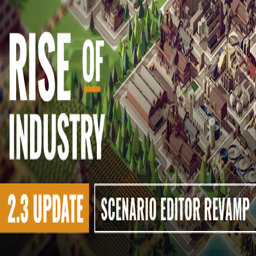

In [ ]:
Image.fromarray(image_dict[671440])

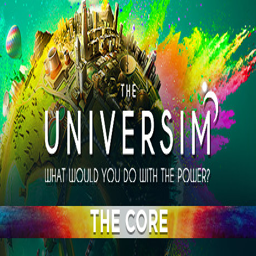

In [ ]:
Image.fromarray(image_dict[352720])

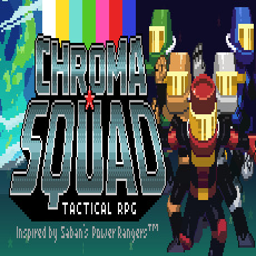

In [ ]:
Image.fromarray(image_dict[251130])

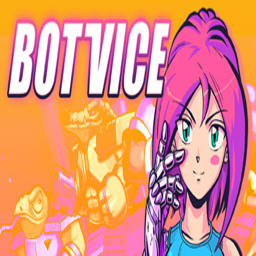

In [ ]:
Image.fromarray(image_dict[491040])

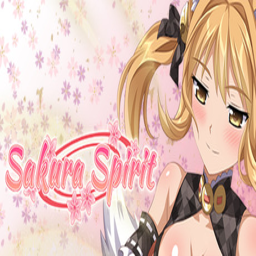

In [ ]:
Image.fromarray(image_dict[313740])

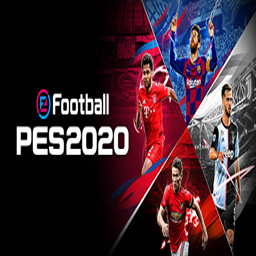

In [ ]:
Image.fromarray(image_dict[996470])

In [ ]:
df[df['game_id'] == 794343]

,game_id,title,content,Image_url,genres,clean_genres


In [ ]:
Image.fromarray(image_dict[794343])

KeyError: ignored

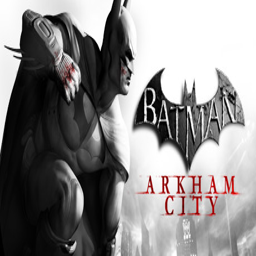

In [ ]:
Image.fromarray(image_dict[57400])

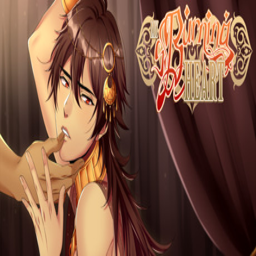

In [ ]:
Image.fromarray(image_dict[921900])

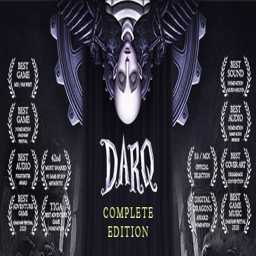

In [ ]:
Image.fromarray(image_dict[433550])

이미지가 없는 데이터가 존재하기 때문에 아래의 데이터 프레임으로 확인 후에 사용하면 될 듯

In [ ]:
image_df = pd.DataFrame(image_df)
image_df.to_csv(DATA_DIR + 'Steam_image_data_v2.csv', index = False)
image_df.head()

,game_id,title,Image_url
0,768520,Red Solstice 2: Survivors,https://cdn.akamai.steamstatic.com/steam/apps/...
1,251570,7 Days to Die,https://cdn.akamai.steamstatic.com/steam/apps/...
2,671510,DESOLATE,https://cdn.akamai.steamstatic.com/steam/apps/...
3,613590,Dungeon Of Zaar - Open Beta,https://cdn.akamai.steamstatic.com/steam/apps/...
4,374280,Hired Ops,https://cdn.akamai.steamstatic.com/steam/apps/...


In [ ]:
len(image_dict)

22458

In [ ]:
22458 / 5000

4.4916

In [ ]:
import pickle

# save
with open(DATA_DIR + 'image_data_dict_v2.pickle', 'wb') as f:
    pickle.dump(image_dict, f, pickle.HIGHEST_PROTOCOL)

# load
with open(DATA_DIR + 'image_data_dict_v2.pickle', 'rb') as f:
    data = pickle.load(f)

len(data)

In [ ]:
Image.fromarray(data[671440])

In [ ]:
Image.fromarray(data[352720])

In [ ]:
Image.fromarray(data[251130])

In [ ]:
Image.fromarray(data[491040])

In [ ]:
Image.fromarray(data[313740])

In [ ]:
Image.fromarray(data[996470])

In [ ]:
Image.fromarray(data[794343])

In [ ]:
Image.fromarray(data[57400])

In [ ]:
Image.fromarray(data[921900])

In [ ]:
Image.fromarray(data[433550])

In [ ]:
'''

data[game_id] 형식으로 접근 후에

256 , 256, 3 크기의 이미지 데이터가 가져와짐

'''